## Project 7 Task 3

Author: [Christian Jackson](https://github.com/ChristianJBNB) <br />
Project Repo: [datafun-06-Projects](https://github.com/ChristianJBNB/datafun-07-ml-predictive) <br />
Date: 6/20/23

## Chapter 10 Task 3 Start

In [1]:
# Use pandas DataFrames to plot Celsius vs Fahrenheit 

c = lambda f: 5 / 9 * (f-32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

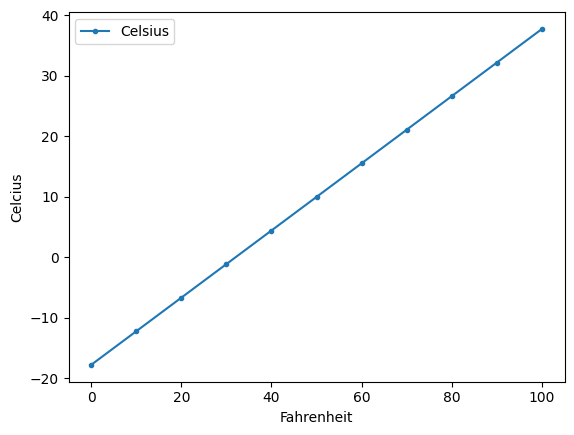

In [4]:
import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celcius')

In [21]:
# Follow the instructions to load NY City January high temperature from a csv file into a DataFrame.

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [22]:
# Follow the instructions to view head and tail of the file. 

nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [23]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


In [24]:
# Follow the instructions to clean the data.

nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [25]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [26]:
# Use describe() to calculate basic descriptive statistics for the dataset. 

pd.set_option('display.precision', 2)
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

In [27]:
# Use the SciPy stats module linregress function to calculate slope and intercept for the best fit line through the data.

from scipy import stats

linear_regression = stats.linregress(x = nyc.Date, y = nyc.Temperature)
linear_regression.slope

0.014771361132966163

In [28]:
linear_regression.intercept

8.694993233674289

In [29]:
# Use your results to predict the "average high temp in Jan" for the year 2026. 

linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

(10.0, 70.0)

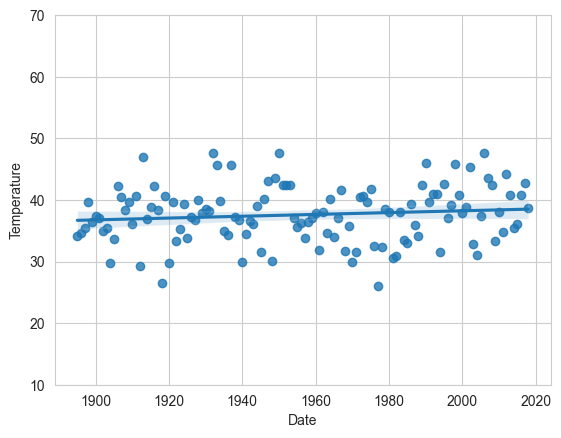

In [30]:
# Follow the instructions and use Seaborn to generate a scatter plot with a best fit line. Set the axes and y limit as instructed.

import seaborn as sns

sns.set_style('whitegrid')
axes = sns.regplot(x = nyc.Date, y = nyc.Temperature)
axes.set_ylim(10,70)

## Chapter 15 Task 3 Start

In [33]:
# This time, we'll use scikit-learn estimator, and we'll practice splitting data for training (to build a model) and testing (testing our model against known values). 

import pandas as pd

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [36]:
X_train.shape

(93, 1)

In [37]:
X_test.shape

(31, 1)

In [40]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [41]:
linear_regression.coef_

array([0.01939167])

In [42]:
linear_regression.intercept_

-0.30779820252656975

In [45]:
predicted = linear_regression.predict(X_test)
expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


In [46]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2026)

array([38.97973189])

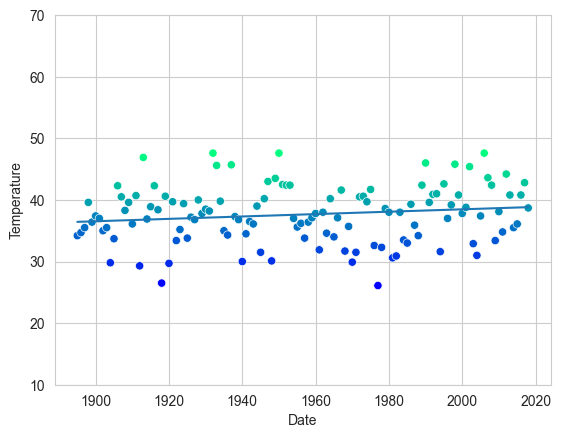

In [47]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)

import matplotlib.pyplot as plt
line = plt.plot(x, y)

## Remarks comparing the two methods

The two methods had very similar intercepts when testing for 2026, with the first method having 38.26 and the second method having 38.98. They also had similar slopes with the first method being .015 and the second method being .019. The biggest difference was the y intercept, with the first method being 8.69 and the second method being -.3. This basically tells me that because the machine learning method runs more tests, it is able to find a more accurate intercept than just running the first method once.